In [271]:
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import random
from pathlib import Path

In [272]:
np.random.seed(42)

In [273]:
#Edit this to point to project root
sep = "\\"
home = f"B:{sep}Dev{sep}GitHub{sep}University{sep}MSc Thesis{sep}StolenVehicleDetector{sep}Machine Learning{sep}OCR{sep}"
local_home = f"{home}"

In [274]:
local_data_dir = f"{local_home}data{sep}"

In [293]:
class PlateGeneratorInit:
    '''The plate generator init class
    '''

    dataset_name = "plate_generator"
    source_url: str = ""

    def __init__(self, data_dir: str, sep: str) -> None:
        self.dataset_dir = data_dir + self.dataset_name
        self.sep = sep
        self.characters: set = set()
        self.fonts: set = set()

    def __download_sources(self):
        pass

    def load(self):
        '''Loads the dataset generator sources before working with it
        '''
        # Download dataset generator sources if it has not been yet
        self.__download_sources()

        characters_path = Path(f"{self.dataset_dir}{sep}characters.txt")
        # Set of characters
        characters = set(line.strip() for line in open(characters_path))
        self.characters = sorted(characters)

        fonts_path = Path(f"{self.dataset_dir}{sep}fonts{sep}")
        # Set of fonts
        self.fonts = list(map(str, list(fonts_path.glob("*.ttf"))))

    def prepare(self):
        '''Prepare the whole dataset before working with it
        '''
        pass

    def show_info(self):
        '''Show dataset generator properties
        '''
        print("Number of fonts: ", len(self.fonts))
        print("Number of unique characters: ", len(self.characters))
        print("Characters present: ", self.characters)

In [294]:
data_loader = PlateGeneratorInit(local_data_dir, sep)
data_loader.load()
data_loader.show_info()

Number of fonts:  18
Number of unique characters:  37
Characters present:  ['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [295]:
#Required input image dimensions (N x N images)
img_h = 50
img_w = 500
#3 means RGB, 1 means grayscale
n_channels = 3

In [296]:
# Batch size for training and validation
batch_size = 4

characters = data_loader.characters
# add space for some kind of regularization
#characters.append(' ')

min_len = 1
max_len = 20

font_str_list = data_loader.fonts
font_size = 50
fonts = list(ImageFont.truetype(font_str, font_size) for font_str in font_str_list)

In [297]:
def generate_text(min_len, max_len, characters):
    # random length between the specified range
    text_length = np.random.randint(max_len, size=1)
    text_length += min_len
    # random char sequence
    char_seq = np.random.choice(characters, size=text_length)
    # shring to string
    text = ""
    for char in char_seq:
        text += char.upper()
    return text

In [342]:
def generate_image(text, image_dim, n_channels, font, min_resize_text=0.75):

    img_type = "L"
    img_colors = (128)
    text_colors = (255)
    # if grayscale image is needed, set grayscale type & colors
    if(n_channels == 3):
        img_type = "RGB"
        img_colors = (0,128,255)
        text_colors = (255,128,0)

    img_h = image_dim[0]
    img_w = image_dim[1]

    bb_dim = font.getbbox(text=text, anchor="la")
    bb_h = bb_dim[3]
    bb_w = bb_dim[2]

    # create background image
    background = Image.new(img_type, (img_w, img_h), img_colors)
    # create text image
    text_img = Image.new(img_type, (bb_w, bb_h), img_colors)
    draw = ImageDraw.Draw(text_img)
    draw.text((0, 0), text, text_colors, anchor="la", font=font)
    draw = ImageDraw.Draw(text_img)

    resize_ratio = 1
    # if text is bigger than background in any dimension, calculate resize_ratio to fit text onto the background
    if((bb_w > img_w) or (bb_h > img_h)):
        req_ratio_w = float(img_w)/float(bb_w)
        req_ratio_h = float(img_h)/float(bb_h)
        resize_ratio = min(req_ratio_w, req_ratio_h)
    # multiply resize_ratio with a value between min_resize_text and 1.01
    resize_ratio *= random.uniform(min_resize_text, 1.01)

    new_h = int(bb_h*resize_ratio)
    new_w = int(bb_w*resize_ratio)
    text_img = text_img.resize((new_w, new_h))

    # random offset between the specified range to fit background
    h_offset_max = max(0, img_h-new_h)
    w_offset_max = max(0, img_w-new_w)
    rand_h_offset = np.random.randint(h_offset_max, size=1)[0]
    rand_w_offset = np.random.randint(w_offset_max, size=1)[0]

    offset = (rand_w_offset, rand_h_offset)
    background.paste(text_img, offset)
    
    return background

In [343]:
def show_image(img):
    image = np.array(img, dtype=float)
    # normalize from [0..255] to [0..1]
    image *= (1/255.0)
    # image to tensor
    image = tf.keras.preprocessing.image.img_to_array(image)
    print(image.shape)

    # if image has only one channel, drop channel dim to plot with matplotlib
    if(image.shape[2] == 1):
        image = image[:,:,0]
    imgplot = plt.imshow(image)
    plt.show()


(57, 13)
(50, 500, 3)


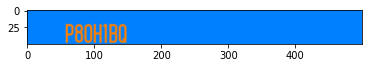

In [355]:
text = generate_text(min_len, max_len, characters)
font = random.choice(fonts)
image = generate_image(text, (img_h, img_w), n_channels, font, min_resize_text=0.75)
show_image(image)

(110, 0)
(50, 500, 3)


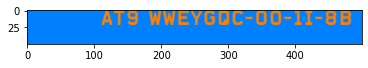

(31, 1)
(50, 500, 3)


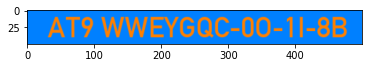

(117, 5)
(50, 500, 3)


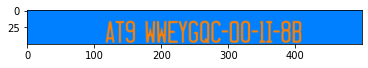

(39, 8)
(50, 500, 3)


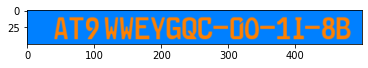

(20, 12)
(50, 500, 3)


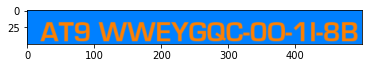

(15, 0)
(50, 500, 3)


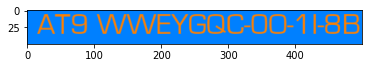

(38, 12)
(50, 500, 3)


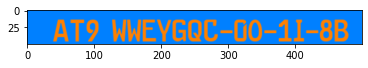

(68, 2)
(50, 500, 3)


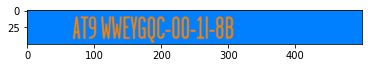

(75, 2)
(50, 500, 3)


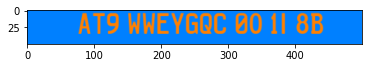

(178, 15)
(50, 500, 3)


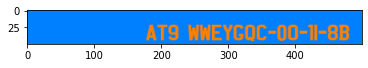

(21, 4)
(50, 500, 3)


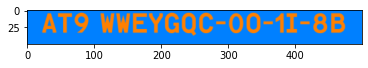

(28, 8)
(50, 500, 3)


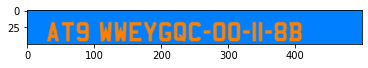

(91, 5)
(50, 500, 3)


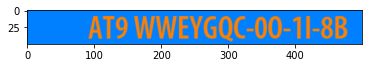

(46, 4)
(50, 500, 3)


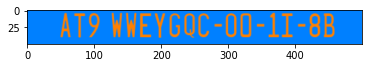

(93, 0)
(50, 500, 3)


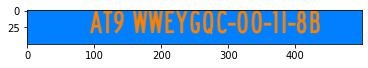

(61, 5)
(50, 500, 3)


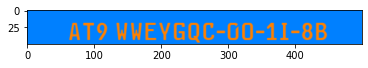

(196, 3)
(50, 500, 3)


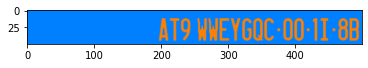

(175, 9)
(50, 500, 3)


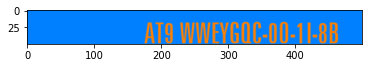

In [345]:
text = "at9 wweygqc-0O-1I-8b".upper()

for font in fonts:
    img = generate_image(text, (img_h, img_w), n_channels, font, min_resize_text=0.75)
    show_image(img)